In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
import warnings
warnings.simplefilter("ignore")

In [66]:
data = pd.read_csv("train.csv")
print(data.head())

   Unnamed: 0 Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0        4968   INN04969             2               1                     1   
1       34540   INN34541             2               0                     1   
2       36108   INN36109             2               0                     2   
3        1553   INN01554             2               0                     0   
4       24974   INN24975             2               1                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  0       Meal Plan 1                           0   
1                  2       Meal Plan 1                           0   
2                  2       Meal Plan 1                           0   
3                  3       Meal Plan 1                           0   
4                  2       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1

In [67]:
data.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            29020 non-null  int64  
 1   Booking_ID                            29020 non-null  object 
 2   no_of_adults                          29020 non-null  int64  
 3   no_of_children                        29020 non-null  int64  
 4   no_of_weekend_nights                  29020 non-null  int64  
 5   no_of_week_nights                     29020 non-null  int64  
 6   type_of_meal_plan                     29020 non-null  object 
 7   required_car_parking_space            29020 non-null  int64  
 8   room_type_reserved                    29020 non-null  object 
 9   lead_time                             29020 non-null  int64  
 10  arrival_year                          29020 non-null  int64  
 11  arrival_month  

In [69]:
data.drop(columns=["Unnamed: 0","Booking_ID"],inplace=True)

In [70]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [71]:
data.shape

(29020, 18)

In [72]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [73]:
data.duplicated().sum()

np.int64(7692)

In [74]:
data.drop_duplicates(inplace=True)

In [75]:
data.shape

(21328, 18)

In [76]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [77]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

In [78]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [79]:
df = data.copy()

UNIVARIATE ANALYSIS

In [80]:
def num_plot_list(df,num_cols):
    fig,axes = plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*5))

    if len(num_cols)==1:
        axes = [axes]

    for i,column in enumerate(num_cols):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette='Blues')
        axes[i][0].set_title(f"Histplot for {column}")

        sns.boxplot(data=df, x=column,ax=axes[i][1],palette='Blues')
        axes[i][1].set_title(f"Boxplot for {column}")
    plt.tight_layout()
    plt.show()

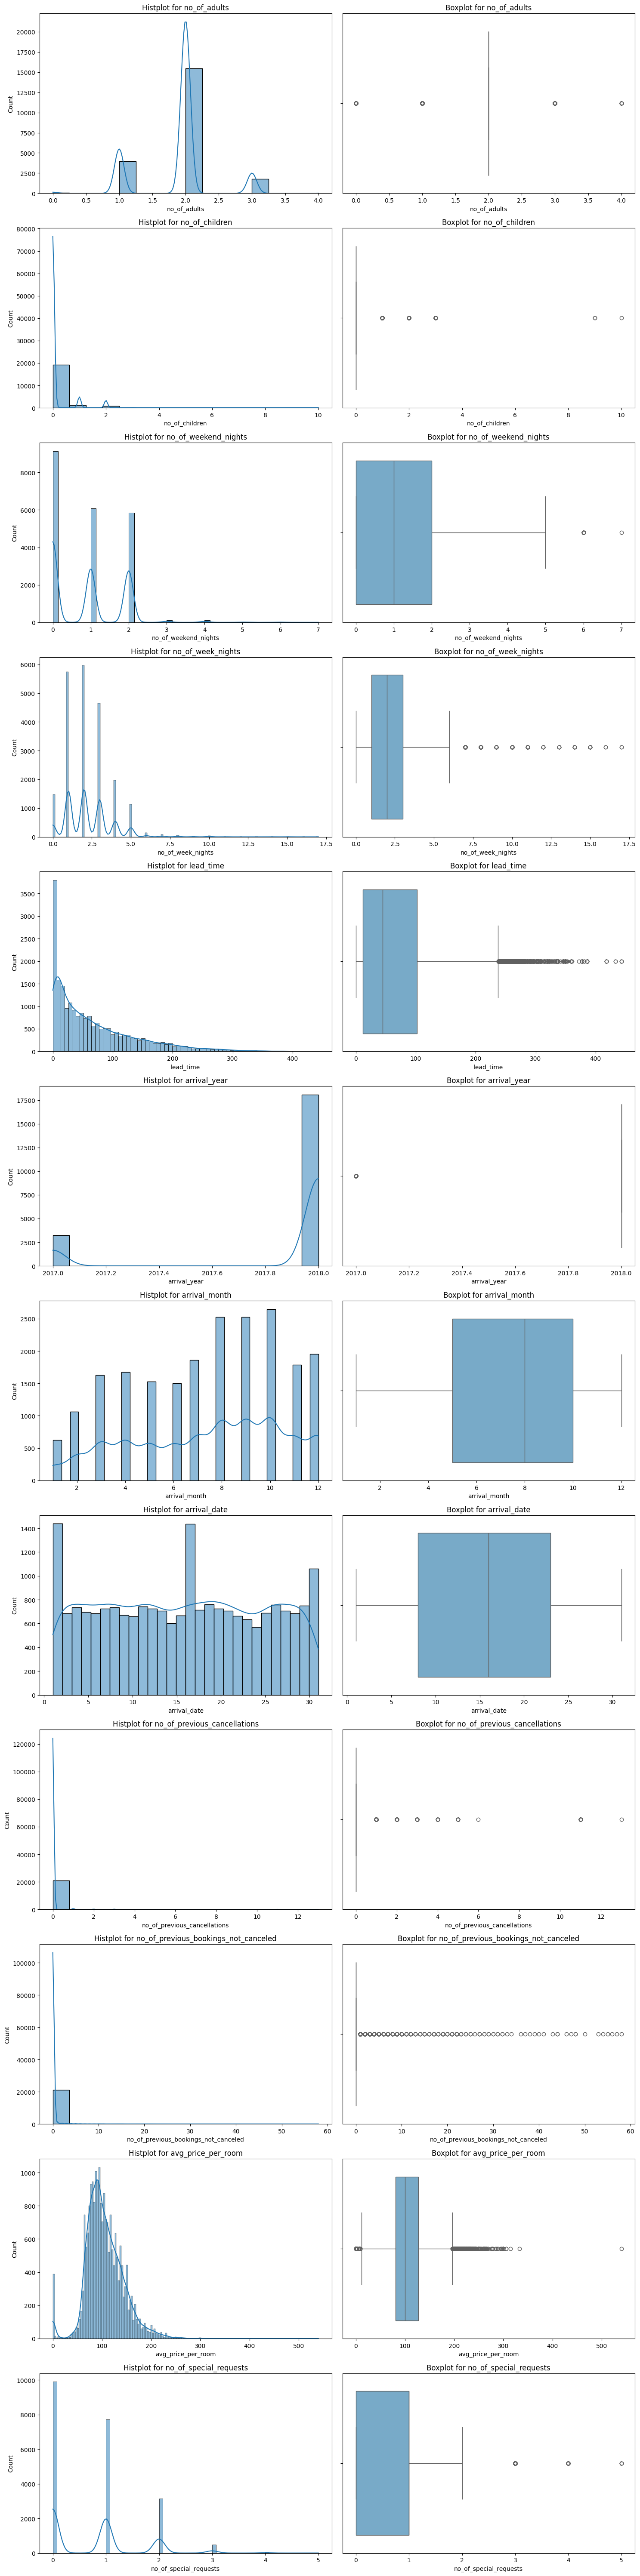

In [81]:
num_plot_list(df,num_cols)

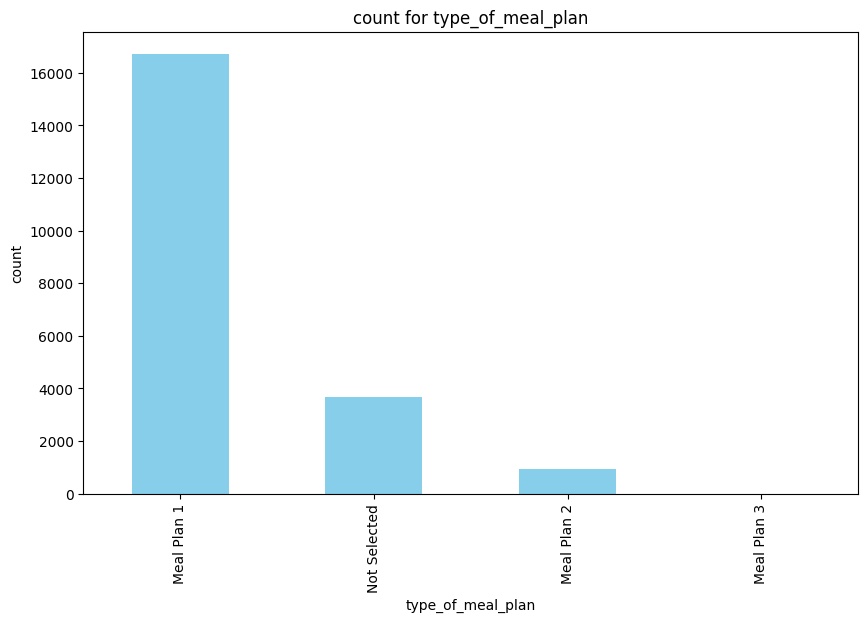

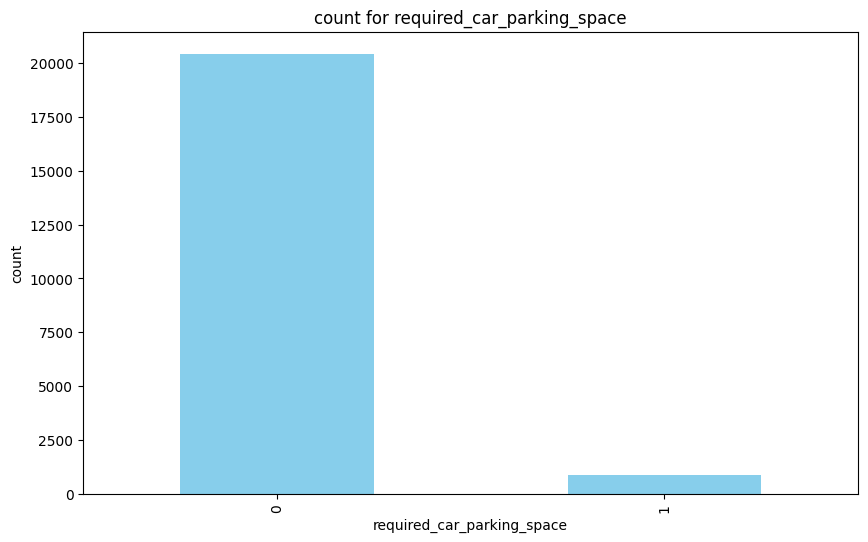

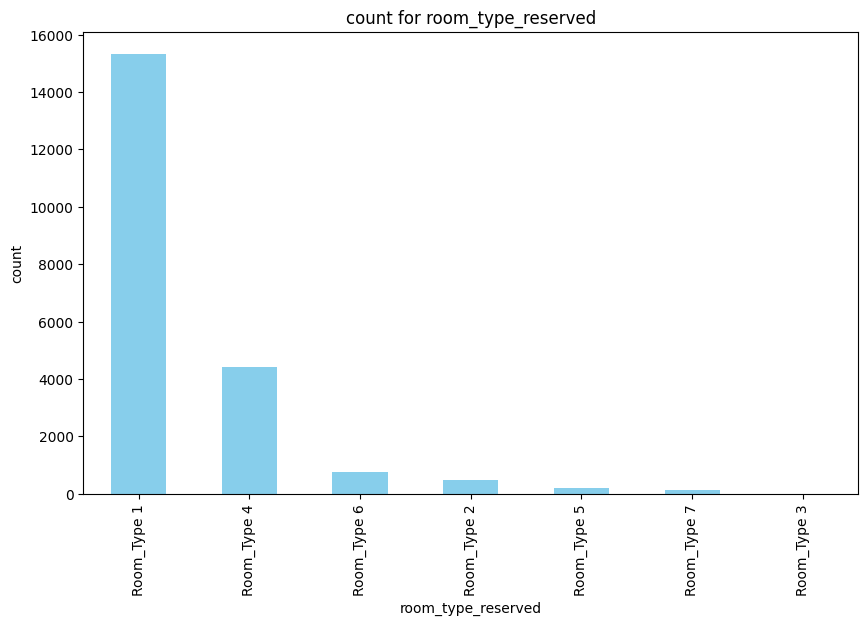

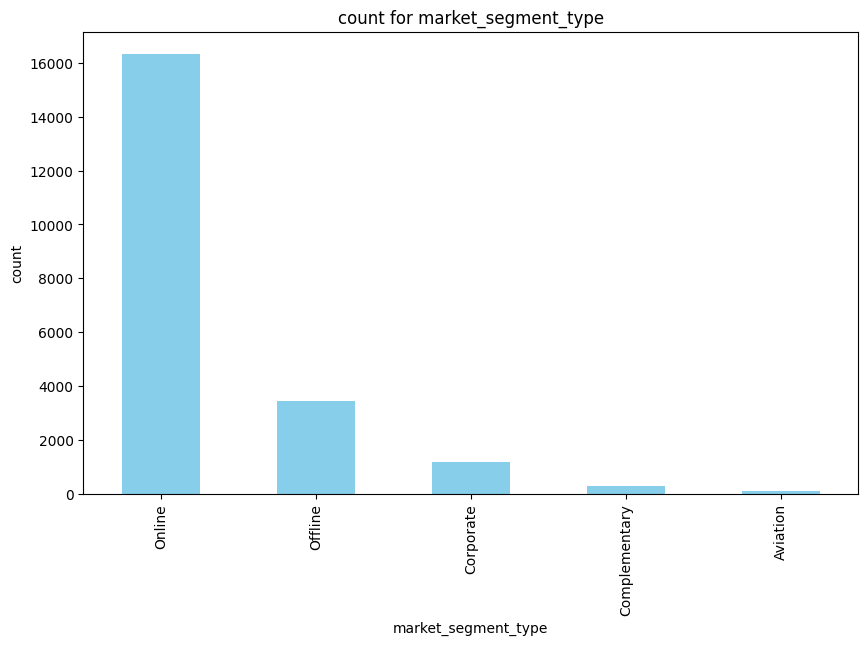

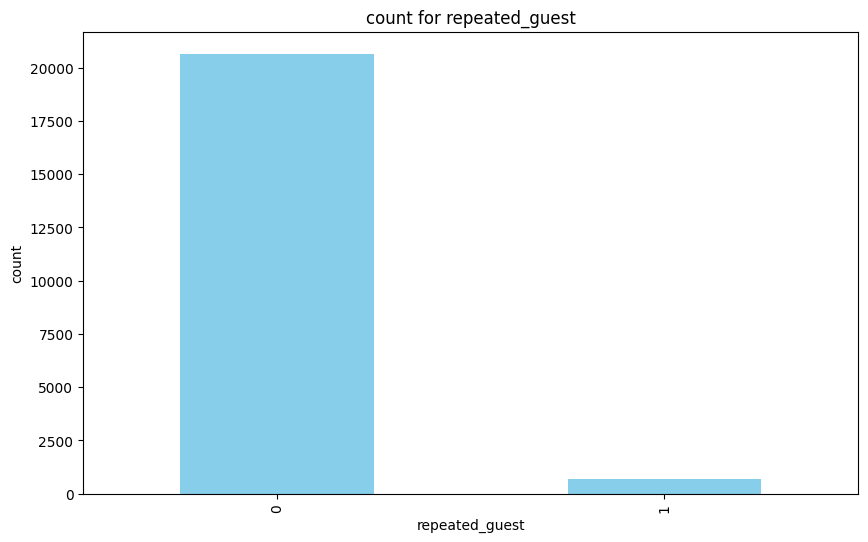

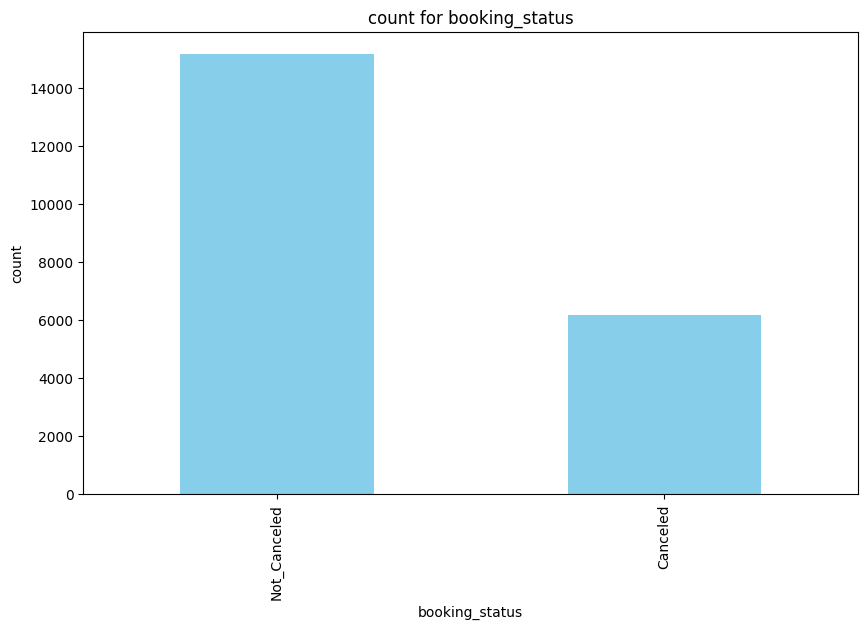

In [82]:
for cat in cat_cols:
    plt.figure(figsize= (10,6))
    df[cat].value_counts().plot(kind="bar",color = "skyblue")
    plt.title(f"count for {cat}")
    plt.xlabel(cat)
    plt.ylabel("count")
    plt.show()

In [83]:
def plot_bivariate(df,target,num_cols):
    num_plots = len(num_cols)
    num_rows = (num_plots+1)//2
    fig, axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))

    axes = axes.flatten()

    for i, column in enumerate(num_cols):
        sns.boxplot(data=df,x=target,y=column,ax=axes[i],palette="Blues")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

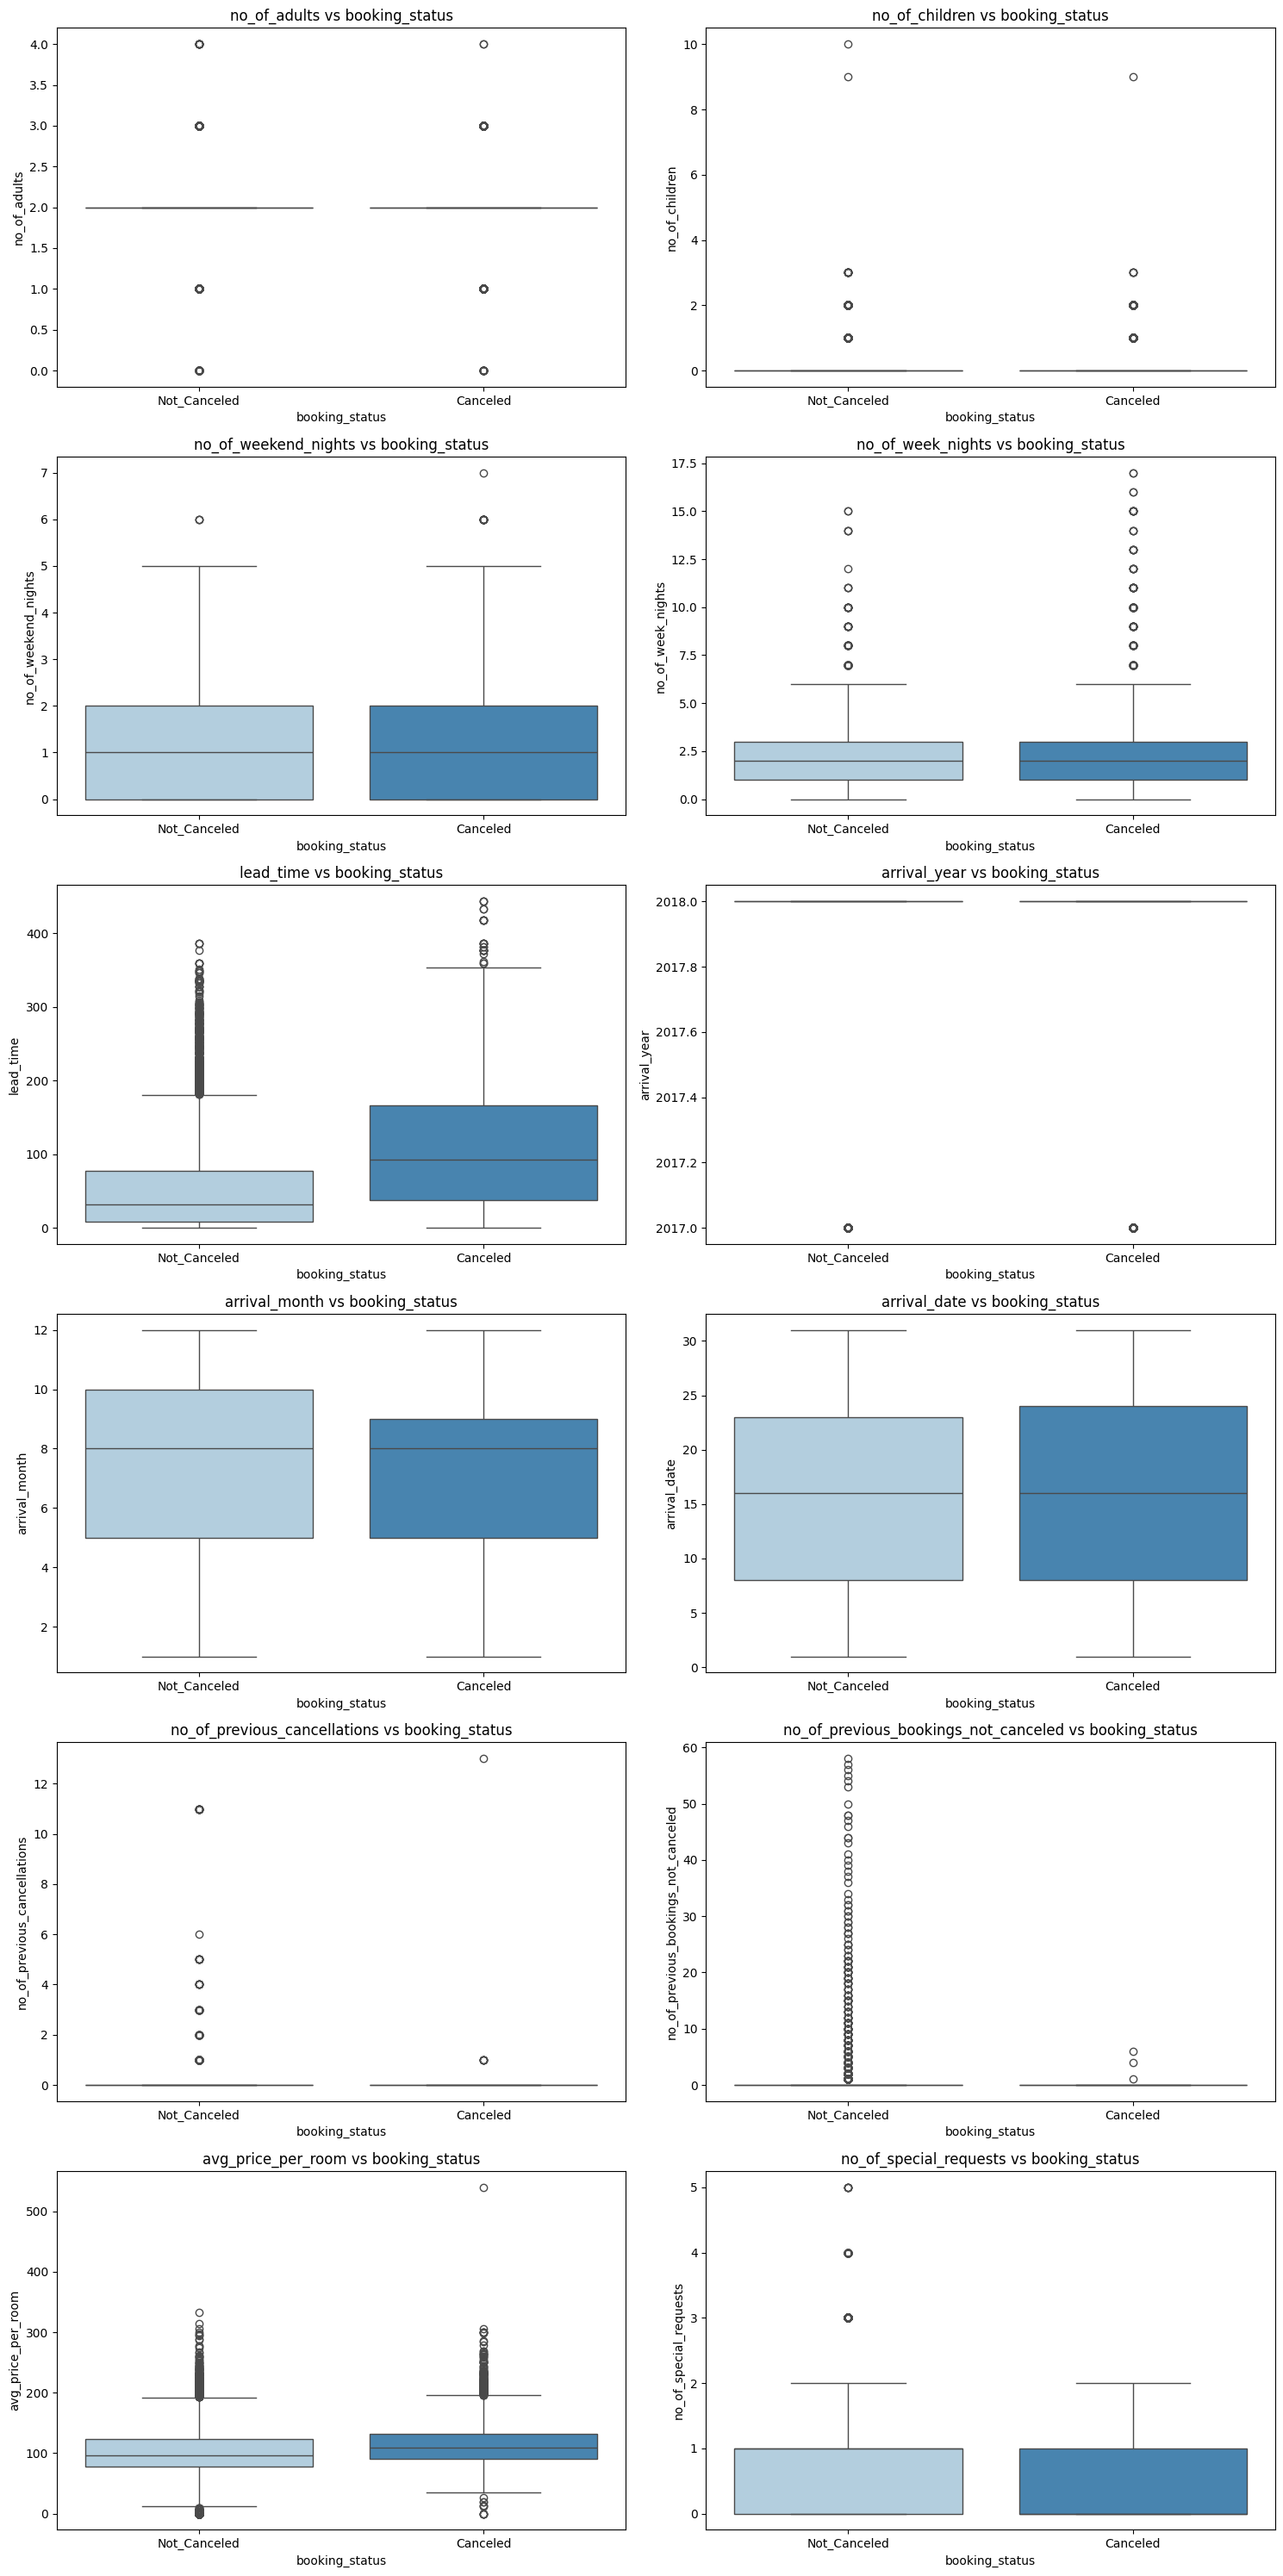

In [84]:
plot_bivariate(df,"booking_status",num_cols)

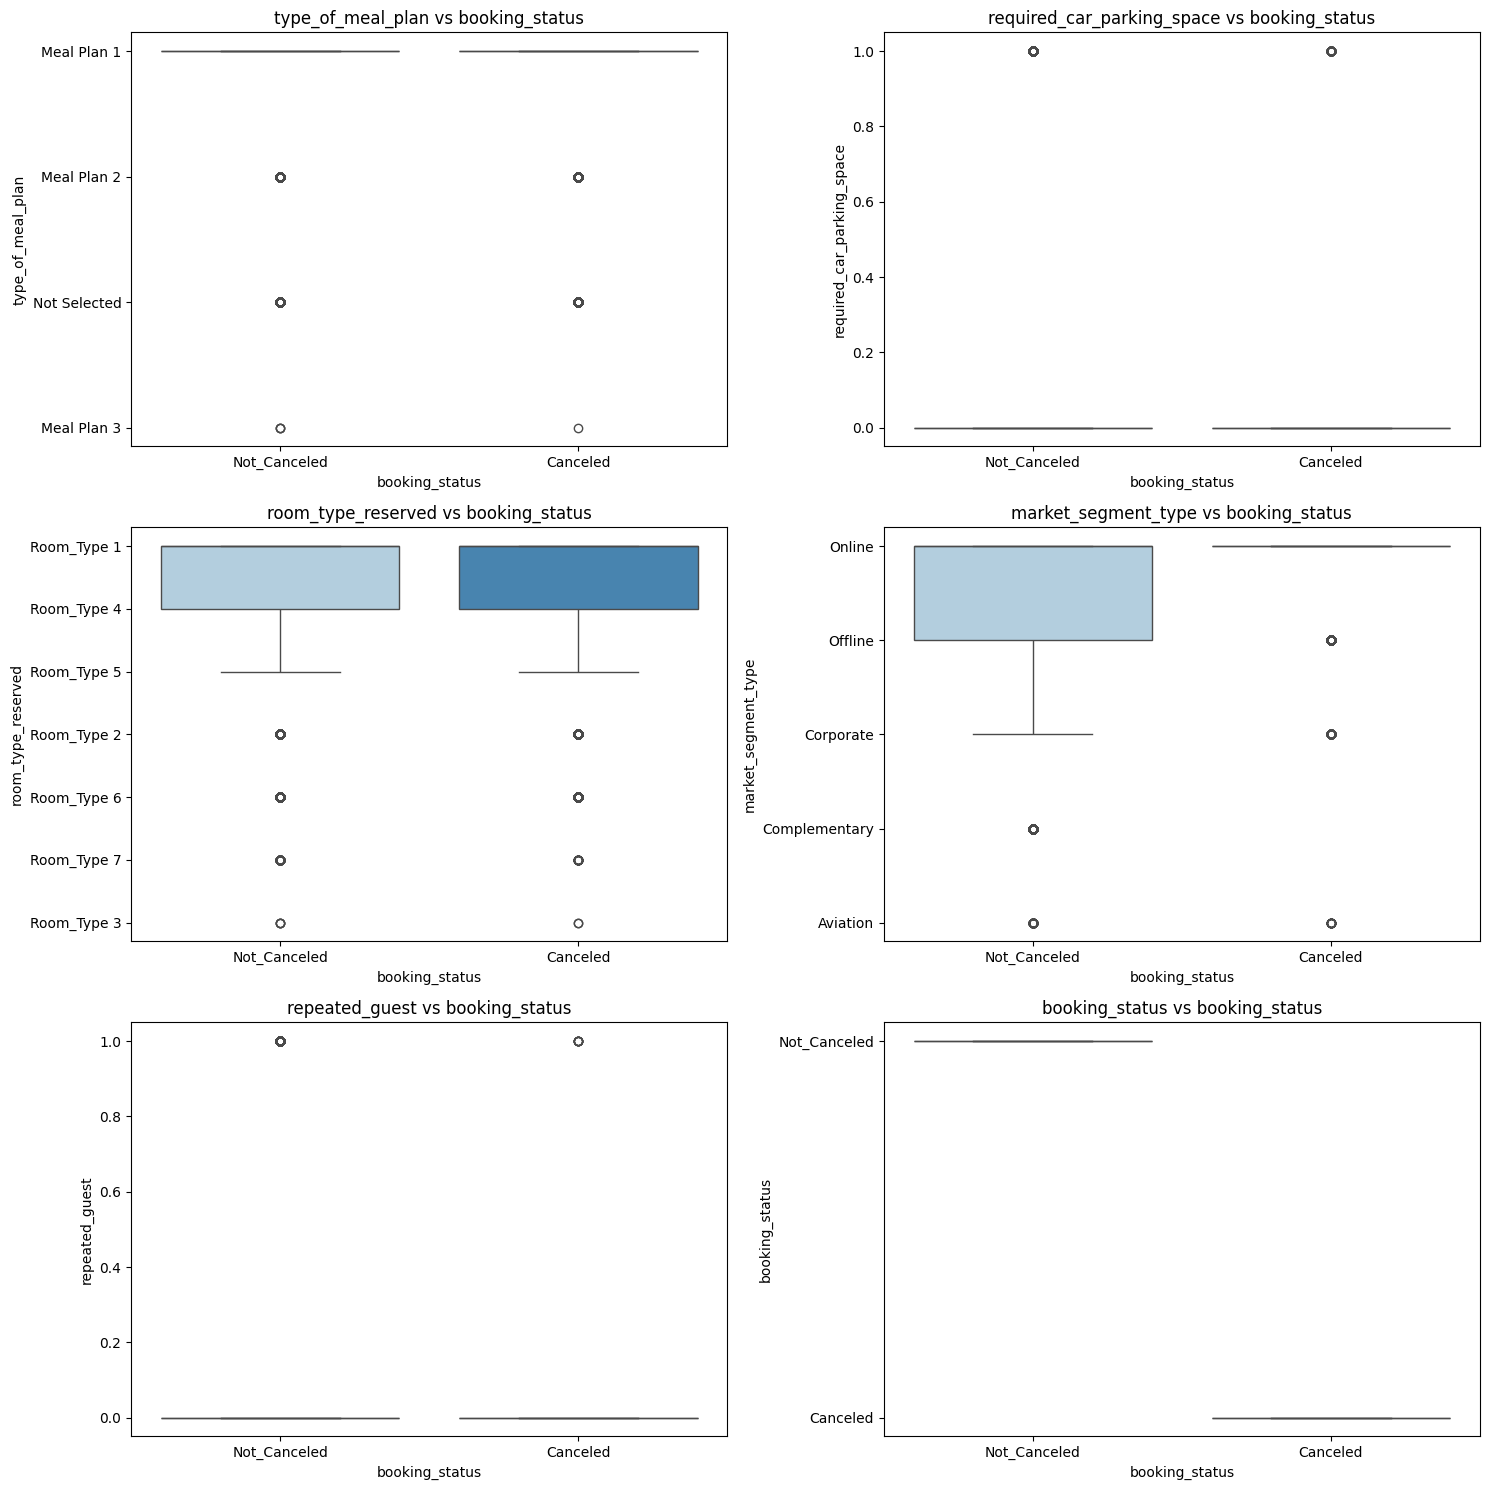

In [85]:
plot_bivariate(df,'booking_status',cat_cols)

In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [87]:
mappings = {}

for i in cat_cols:
    data[i] = label_encoder.fit_transform(data[i])
    mappings[i] = {label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}


In [88]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [89]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



In [92]:
X = add_constant(data)

v_data = pd.DataFrame()

v_data["features"] = X.columns
v_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [93]:
v_data

,features,VIF
0,const,4.062951e+07
1,no_of_adults,1.334935e+00
2,no_of_children,1.278657e+00
3,no_of_weekend_nights,1.080022e+00
4,no_of_week_nights,1.134511e+00
5,type_of_meal_plan,1.179220e+00
6,required_car_parking_space,1.033016e+00
7,room_type_reserved,1.568520e+00
8,lead_time,1.411580e+00
9,arrival_year,1.288129e+00


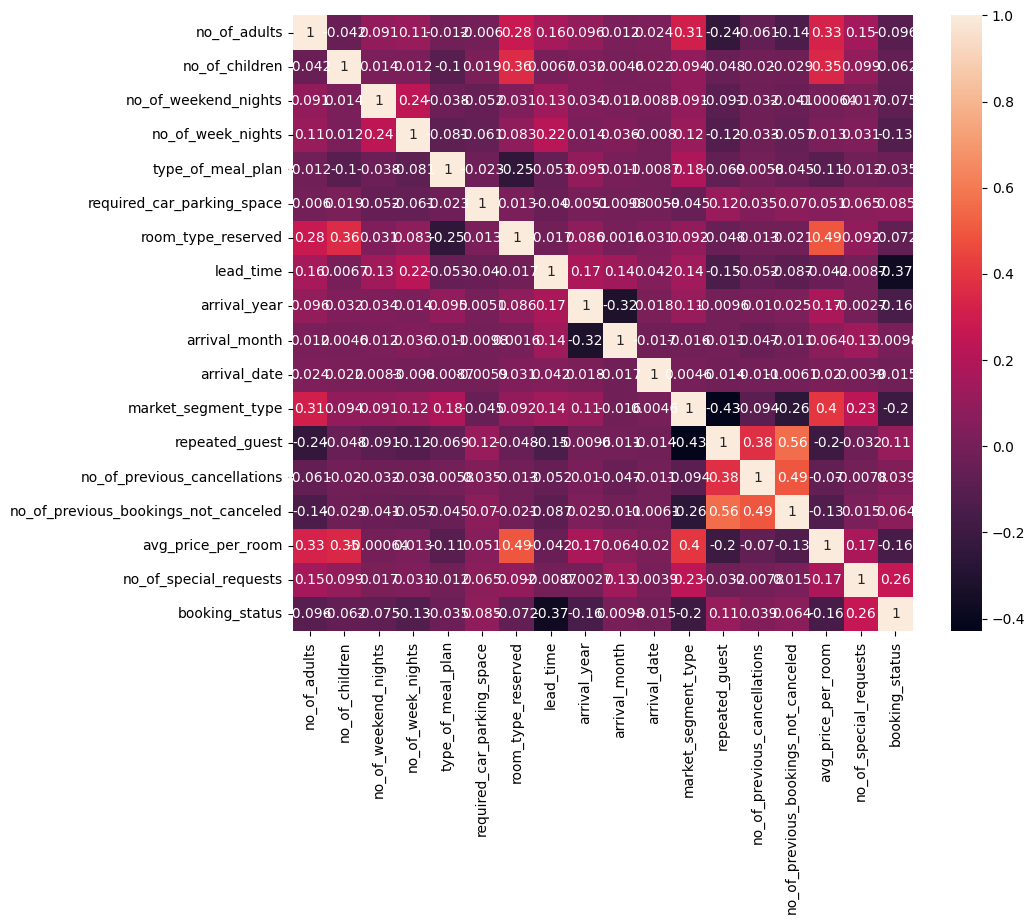

In [95]:
corr = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot = True)
plt.show()

In [96]:
skew_measure = data.skew()
print(skew_measure)

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            22.323003
no_of_previous_bookings_not_canceled    16.224288
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64


In [99]:
import numpy as np
for col in data.columns:
    if skew_measure[col] >5:
        data[col] = np.log1p(data[col])


In [100]:
skew_new = data.skew()
print(skew_new)

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            13.500797
no_of_previous_bookings_not_canceled     7.681992
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64


In [101]:
x = data.drop(columns="booking_status")
y = data["booking_status"]

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_res,y_res = smote.fit_resample(x,y)

  File "d:\mlops\venv1\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\india\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\india\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\india\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [108]:
x_res.shape

(30350, 17)

In [109]:
y_res.value_counts()

booking_status
1    15175
0    15175
Name: count, dtype: int64

In [110]:
balanced_df = pd.DataFrame(x_res,columns = x.columns)
balanced_df['booking_status'] = y_res

print(balanced_df.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     1                  0   
1             2               0                     1                  2   
2             2               0                     2                  2   
3             2               0                     0                  3   
4             2               1                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   3   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   3   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0          3          2017    

In [111]:
balanced_df.shape

(30350, 18)

In [112]:
data_final  = balanced_df.copy()

In [114]:
x_new = data_final.drop(columns="booking_status")
y_new = data_final["booking_status"]

In [115]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(x_new,y_new)


RandomForestClassifier(random_state=42)

In [117]:
feature_importance = model.feature_importances_

In [118]:
fi_df = pd.DataFrame({
    "Features": x.columns,
    "Importance": feature_importance
})

In [120]:
fi_df.sort_values(by = "Importance",ascending=False)

,Features,Importance
7,lead_time,0.261008
16,no_of_special_requests,0.184085
15,avg_price_per_room,0.148047
9,arrival_month,0.089287
10,arrival_date,0.082678
11,market_segment_type,0.058219
3,no_of_week_nights,0.045068
2,no_of_weekend_nights,0.029280
4,type_of_meal_plan,0.021316
6,room_type_reserved,0.019021


In [122]:
top_10_features = fi_df["Features"].head(10).values

top_10_df = data_final[top_10_features.tolist()+["booking_status"]]

In [124]:
top_10_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,booking_status
0,2,1,1,0,0,0,0,3,2017,8,1
1,2,0,1,2,0,0,3,9,2018,2,1
2,2,0,2,2,0,0,0,24,2018,12,1
3,2,0,0,3,0,0,0,23,2018,6,0
4,2,1,0,2,0,0,3,9,2018,9,1


In [125]:
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30350 entries, 0 to 30349
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   no_of_adults                30350 non-null  int64
 1   no_of_children              30350 non-null  int64
 2   no_of_weekend_nights        30350 non-null  int64
 3   no_of_week_nights           30350 non-null  int64
 4   type_of_meal_plan           30350 non-null  int64
 5   required_car_parking_space  30350 non-null  int64
 6   room_type_reserved          30350 non-null  int64
 7   lead_time                   30350 non-null  int64
 8   arrival_year                30350 non-null  int64
 9   arrival_month               30350 non-null  int64
 10  booking_status              30350 non-null  int64
dtypes: int64(11)
memory usage: 2.5 MB


In [126]:
df = top_10_df.copy()

In [143]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [129]:
x = df.drop(columns="booking_status")
y = df["booking_status"]

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.2)
classifiers = {
    "RandomForestClassifier" : RandomForestClassifier(random_state=42),
    "AdaBoostClassifier" : AdaBoostClassifier(random_state=42),
    "GradientBoostingClassifier" : GradientBoostingClassifier(random_state=42),
    "SVC" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB" : GaussianNB(),
    "XGBClassifier" : XGBClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42),
    "Logistic": LogisticRegression(random_state=42)
}

In [145]:
metrics = {
    "Model" : [],
    "Accurcay" : [],
    "Recall" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [146]:
for model_name,classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    metrics["Model"].append(model_name)
    metrics["Accurcay"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [149]:
metrics_temp = pd.DataFrame(metrics)
print(metrics_temp)

                        Model  Accurcay    Recall  Precision  F1 Score
0      RandomForestClassifier  0.764909  0.758701   0.766064  0.762365
1          AdaBoostClassifier  0.689951  0.598608   0.729108  0.657444
2  GradientBoostingClassifier  0.730313  0.711966   0.736626  0.724086
3                         SVC  0.652883  0.776268   0.620562  0.689736
4               Decision Tree  0.738715  0.722241   0.744448  0.733176
5        KNeighborsClassifier  0.735585  0.708982   0.746336  0.727180
6                  GaussianNB  0.603295  0.322506   0.727749  0.446945
7               XGBClassifier  0.756013  0.753729   0.754980  0.754354
8                        LGBM  0.754036  0.750083   0.753831  0.751952
9                    Logistic  0.677430  0.722241   0.660503  0.689994


In [151]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.2)
rf = RandomForestClassifier(random_state=42)

In [156]:
params_dict = {
    'n_estimators':randint(100,500),
    "max_depth" : randint(10,50),
    "min_samples_split" : randint(2,10),
    "min_samples_leaf" : randint(1,5),
    "bootstrap" : [True, False]
}

In [157]:
random_search =RandomizedSearchCV(
    estimator = rf,
    param_distributions = params_dict,
    n_iter = 5,
    cv = 5,
    verbose = 2,
    scoring = "accuracy"
)

In [158]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV] END bootstrap=True, max_depth=39, min_samples_leaf=1, min_samples_split=6, n_estimators=198; total time=  32.7s
[CV] END bootstrap=True, max_depth=39, min_samples_leaf=1, min_samples_split=6, n_estimators=198; total time=  32.0s
[CV] END bootstrap=True, max_depth=39, min_samples_leaf=1, min_samples_split=6, n_estimators=198; total time=  32.0s
[CV] END bootstrap=True, max_depth=39, min_samples_leaf=1, min_samples_split=6, n_estimators=198; total time=  31.8s
[CV] END bootstrap=True, max_depth=39, min_samples_leaf=1, min_samples_split=6, n_estimators=198; total time=  31.9s
[CV] END bootstrap=False, max_depth=41, min_samples_leaf=2, min_samples_split=4, n_estimators=106; total time=  22.7s
[CV] END bootstrap=False, max_depth=41, min_samples_leaf=2, min_samples_split=4, n_estimators=106; total time=  22.7s
[CV] END bootstrap=False, max_depth=41, min_samples_leaf=2, min_samples_split=4, n_estimators=106; total time=  22.5s
[CV] END bootstrap=False, max_depth=41, min_samples_leaf=2, m

KeyboardInterrupt: 

In [ ]:
random_search.best_params_